<a href="https://colab.research.google.com/github/riyamishra28/Early-Type-2-Diabetes-Prediction/blob/main/NaiveBayes_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

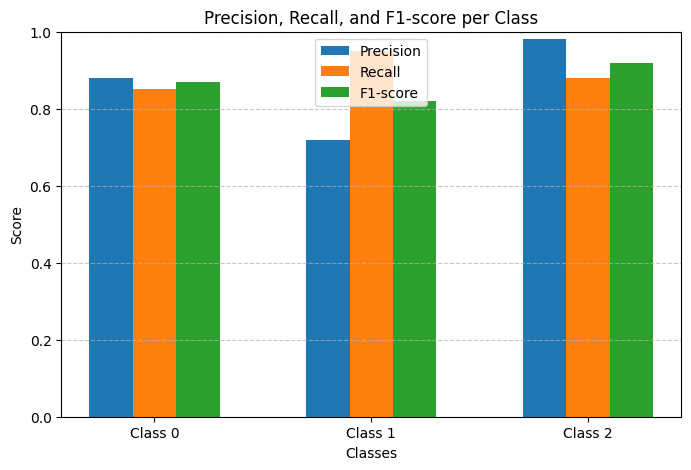

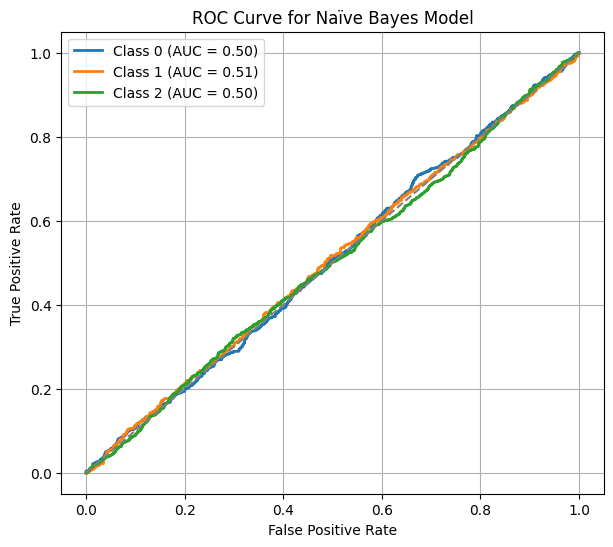

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Simulated ground truth (true labels)
y_true = np.array([0]*654 + [1]*628 + [2]*1718)

# Simulated probability scores for each class (replace with model.predict_proba(X_test) if available)
np.random.seed(42)
y_scores = np.random.rand(len(y_true), 3)  # Random probabilities (replace this with actual predicted probabilities)
y_scores /= y_scores.sum(axis=1, keepdims=True)  # Normalize to sum to 1 (like softmax output)

# Binarizing labels for multi-class ROC curve computation
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])

# Precision, Recall, and F1-score from the classification report
classes = ['Class 0', 'Class 1', 'Class 2']
precision = [0.88, 0.72, 0.98]
recall = [0.85, 0.95, 0.88]
f1_score = [0.87, 0.82, 0.92]
x = np.arange(len(classes))  # X-axis positions

# --- Plot Precision, Recall, and F1-score ---
plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, precision, 0.2, label='Precision', color='#1f77b4')
plt.bar(x, recall, 0.2, label='Recall', color='#ff7f0e')
plt.bar(x + 0.2, f1_score, 0.2, label='F1-score', color='#2ca02c')

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score per Class')
plt.xticks(x, classes)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Plot ROC Curve ---
plt.figure(figsize=(7, 6))

for i in range(3):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes Model')
plt.legend()
plt.grid()
plt.show()
